# Objective
Provide basic clustering and analysis for an SNR test image with the following properties:

- Number of spots: 50
- Spot shape: 2D Gaussian (sigma = 1.75 pixels)
- SNR distribution: Gaussian (mu = 20, sigma = 20)
- Background image: MAX_ISP_300_1.tif (mouse lung)
- Spot image generated 20180713
- Sent for annotation 20180716
- Annotations received 20180718

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True
img_height = 300

In [2]:
json_filename = 'SNR_test.json'
img_filename = 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_20_spot_img.png'
csv_filename = 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_20_coord_snr_list.csv'

### Load data, get the dataframe 

In [3]:
ba = QuantiusAnnotation(json_filename)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()

# Overview of Annotations 
#### Worker annotations only

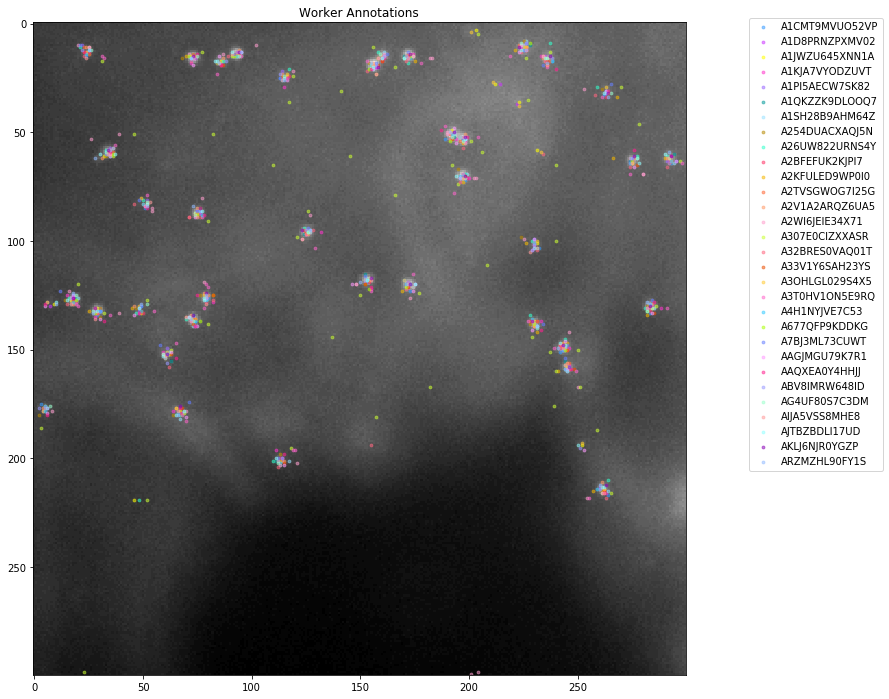

In [4]:
show_ref_points = False
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Show reference points (big yellow dots)

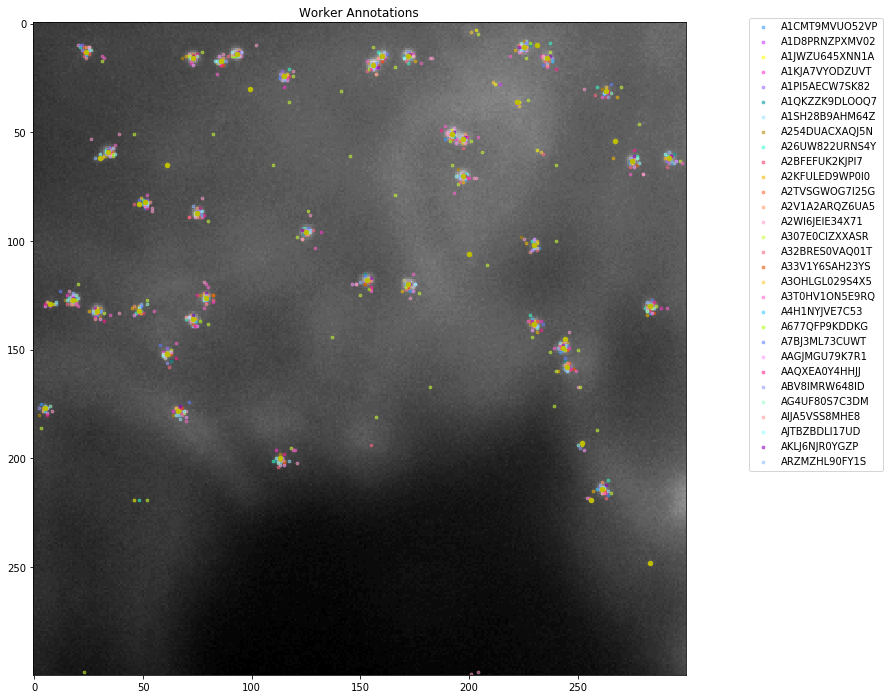

In [5]:
show_ref_points = True
show_workers = True
show_clusters = False
clustering_params = None
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### Worker annotations with cluster centroids

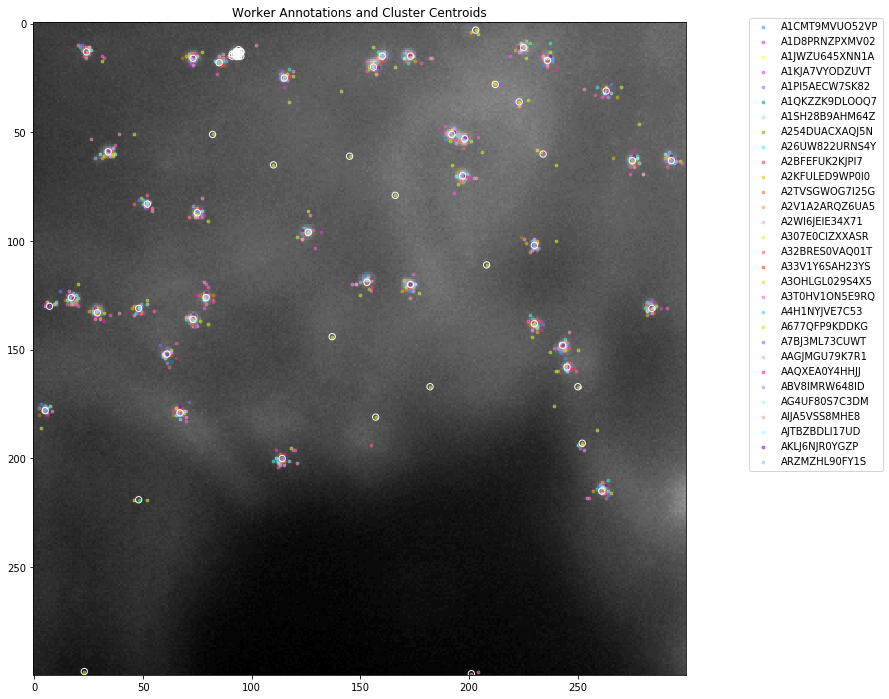

In [6]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

#### correctness_threshold = 4, 10, 20

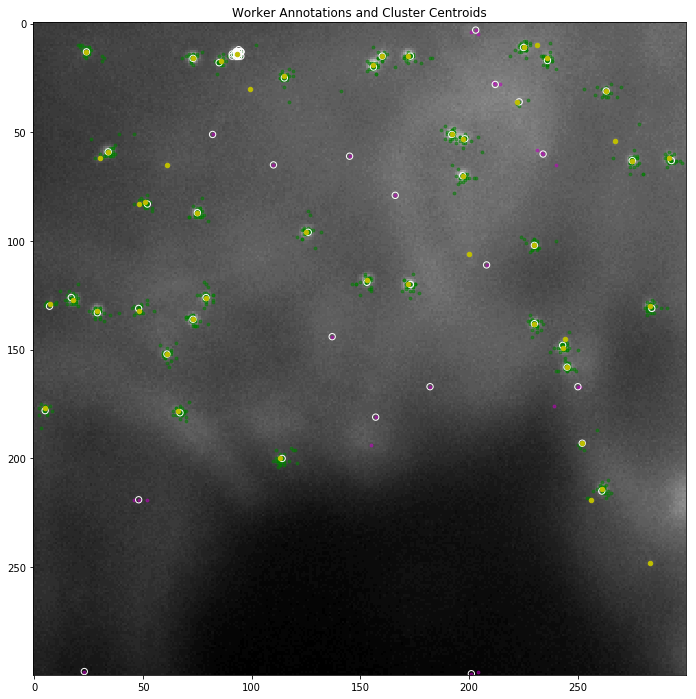

In [7]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 4

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

**Takeaways:** 
- It looks like screening clusters based on cluster membership might be *crucial*.
- It also looks like it would be feasible to tease apart clusters that are close together based on on cluster membership.

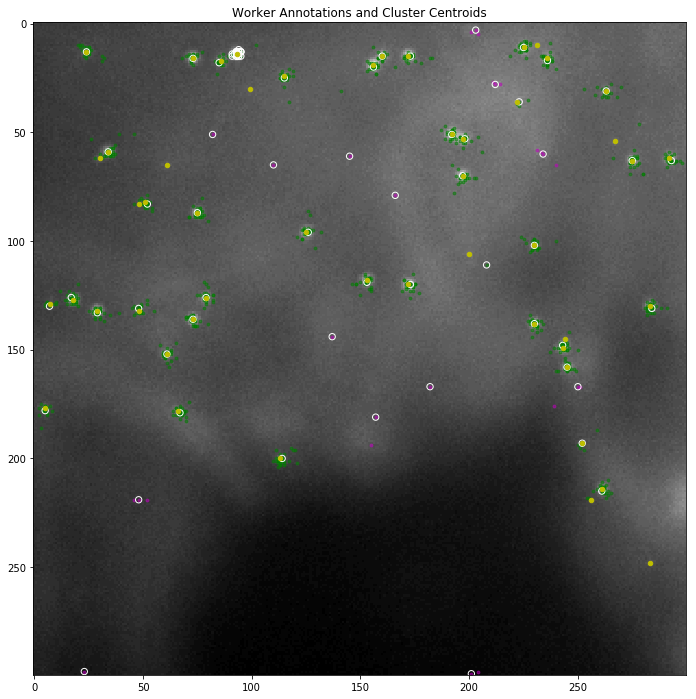

In [8]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 10

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

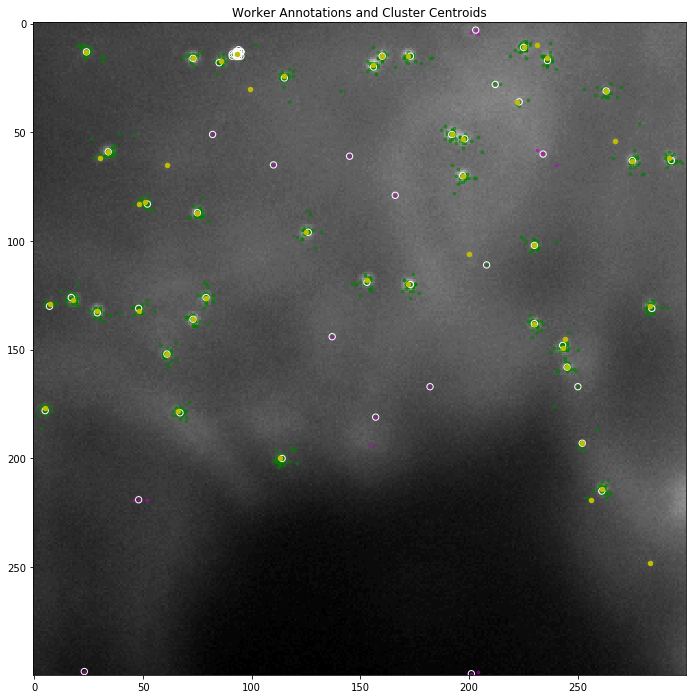

In [9]:
show_ref_points = True
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = True
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = 20

sa.plot_annotations(anno_all, img_filename, csv_filename, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

**Takeaway:** 4 and 10 are good correctness thresholds at this SNR. (All green clusters have ref point, no magenta clusters have ref point.)

# Worker Average Speed

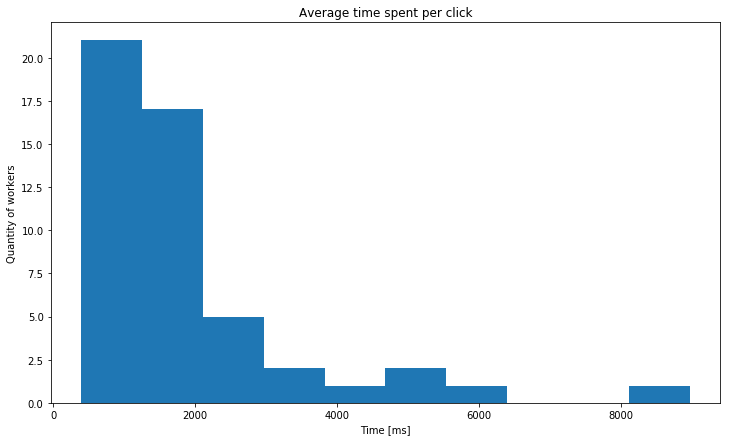

In [10]:
bigger_window_size = False
sa.plot_avg_time_per_click(anno_all, bigger_window_size)
bigger_window_size = True

**Takeaway:** Most workers tend to click quickly on average. (We would potentially lose a lot of data when trying to screen on click speed.)

# Accuracy and Speed
Across clicks, investigate the relationship between accuracy (measured as distance from the click to the nearest neighbor) and speed (measured as the difference between the click's timestamp and the previous click's timestamp).

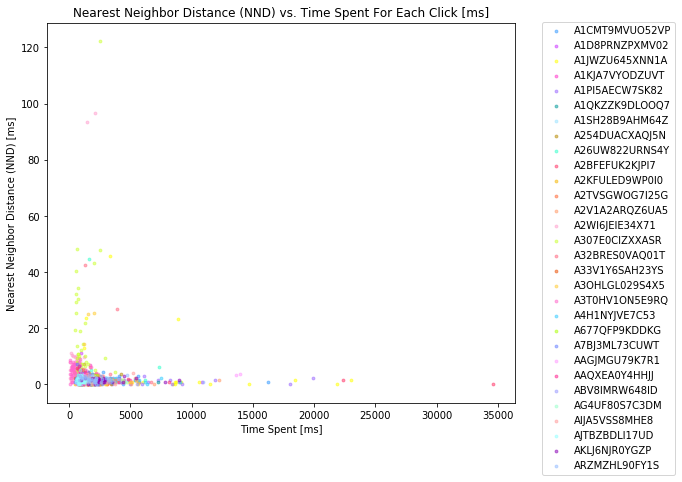

In [11]:
show_correctness = False
correctness_threshold = None
clustering_params = None
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params)

**Takeaway:** Accuracy has not markedly improved between SNR mu = 5, 10, 20.

#### Each point (each click) colored according to the correctness of the cluster of which it is a member:

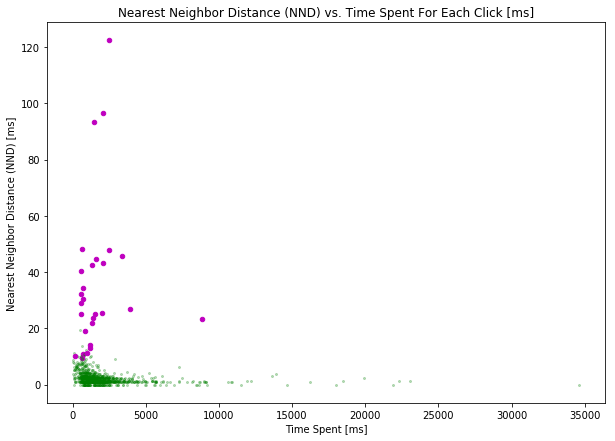

In [12]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
sa.plot_nnd_vs_time_spent(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params)

**Takeaway:** Bad clicks are generally getting associated with bad clusters.


# Compare Accuracy Between Workers
Compare accuracy (measured as distance from the click to the nearest neighbor) between different workers in a dataframe. Color each point (each click) according to the correctness of the cluster of which it is a member.

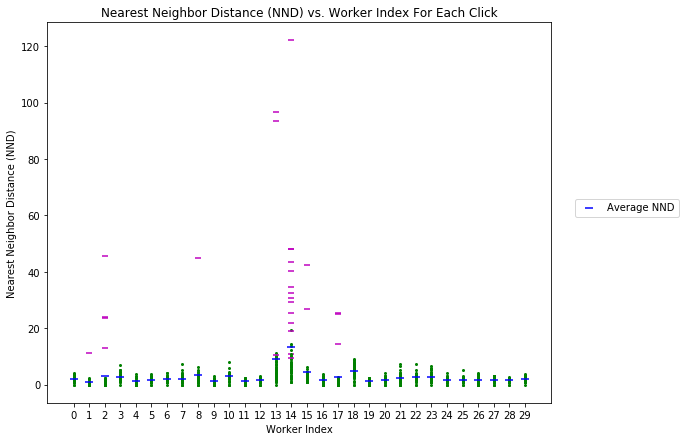

In [13]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_nnd_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

**Takeaway:** Many workers have some bad points.

# Compare Speed Between Workers
Compare speed (measured as the difference between the click's timestamp and the previous click's timestamp) between different workers in a dataframe. Color each point (each click) according to the correctness of the cluster of which it is a member.

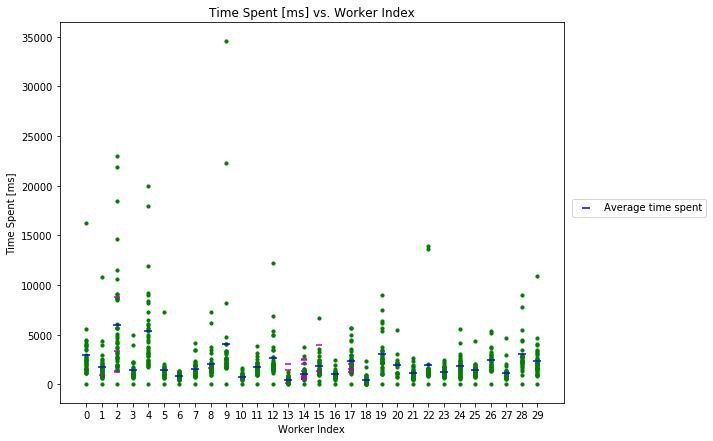

In [14]:
show_correctness = True
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]
show_avgs = True
sa.plot_time_spent_vs_worker_index(anno_all, img_filename, csv_filename, show_correctness, correctness_threshold, clustering_params, show_avgs)

# Total Time Spent by Each Worker
For each worker, plot total time spent (defined as the difference between the max timestamp and the min timestamp) vs. worker index. Each bar represents one worker.

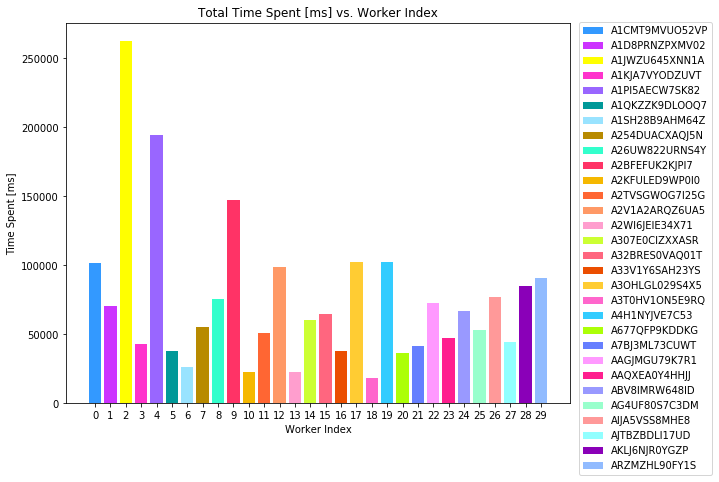

In [15]:
sa.plot_total_time_vs_worker_index(anno_all, img_filename)

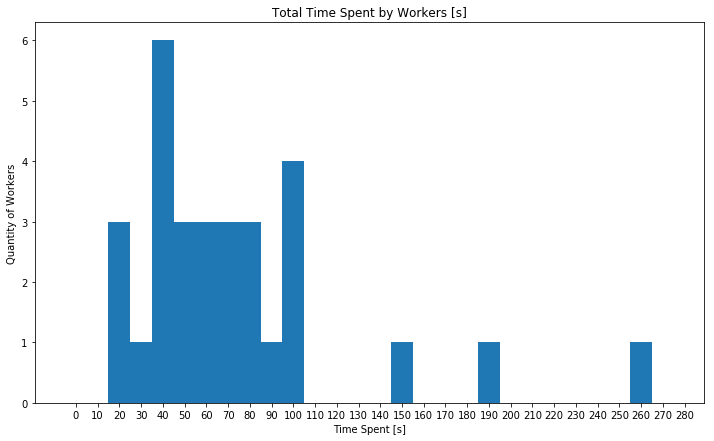

In [16]:
anno_all = ba.df()
anno_one_snr = ba.slice_by_image(anno_all, img_filename)
bigger_window_size = False
sa.plot_total_worker_time_hist(anno_one_snr, bigger_window_size)

## Worker Pairwise Scores
For each worker, score = sum(pair scores of that worker).

Pair score for worker_A and worker_B 

= [(avg NND worker_A -> worker_B) + (avg NND worker_B -> worker_A)] / 2

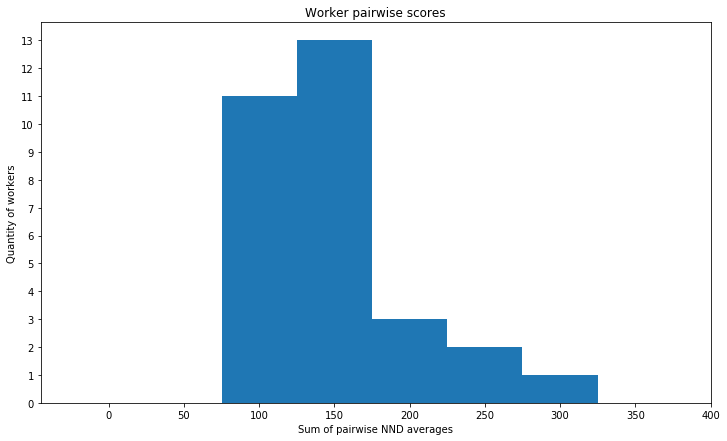

In [17]:
sa.plot_worker_pairwise_scores_hist(anno_one_snr, bigger_window_size)

**Takeaways 20180722:** Only a few workers have notably high (= bad) pairwise scores. This could be a good way to screen bad workers before the first round of clustering.

# Worker Error and Correctness
It is helpful to view the following two plots together.

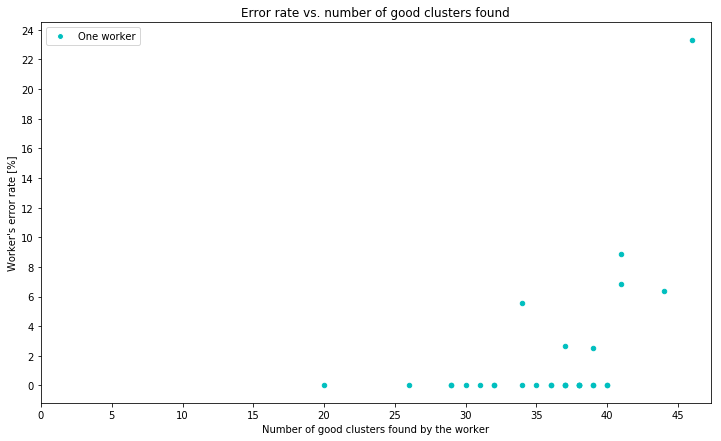

In [18]:
sa.plot_error_rate_vs_spotted(anno_one_snr, clustering_params, correctness_threshold, csv_filename, img_filename, bigger_window_size)

**Takeaways 20180722:** Many workers who find more good clusters have higher error rates than workers who don't find as many good clusters. The former are more willing to interpret something as a spot and click it; the latter are more likely to stick with the obvious spots.

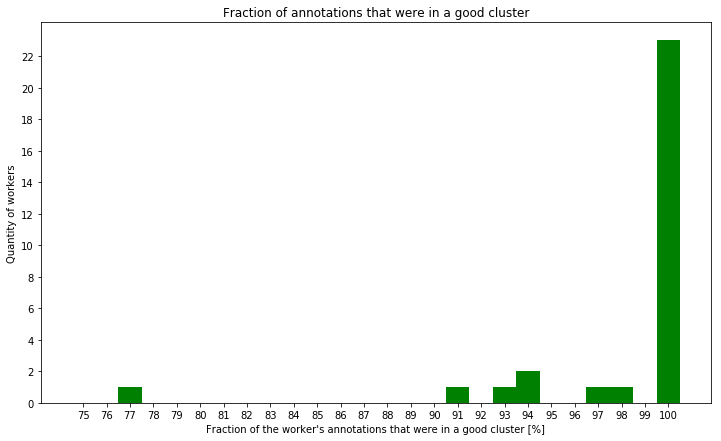

In [19]:
sa.plot_workers_correct_rate(anno_one_snr, clustering_params, correctness_threshold, csv_filename, img_filename, bigger_window_size)

**Takeaways 20180722:** The majority of workers click only on actual spots.

# Spot SNR and Cluster Membership
It is helpful to view the following three plots together.

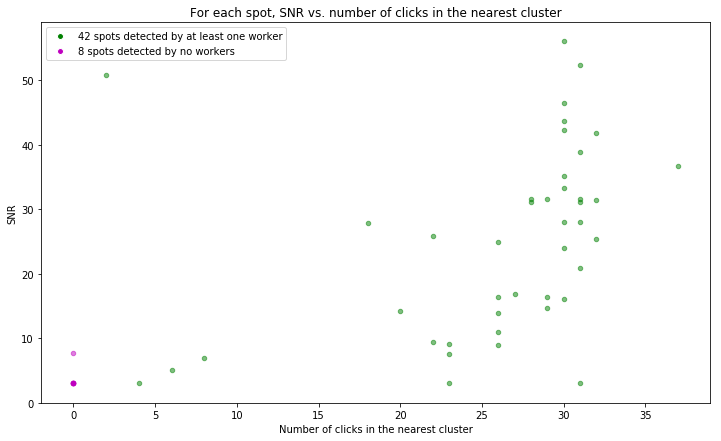

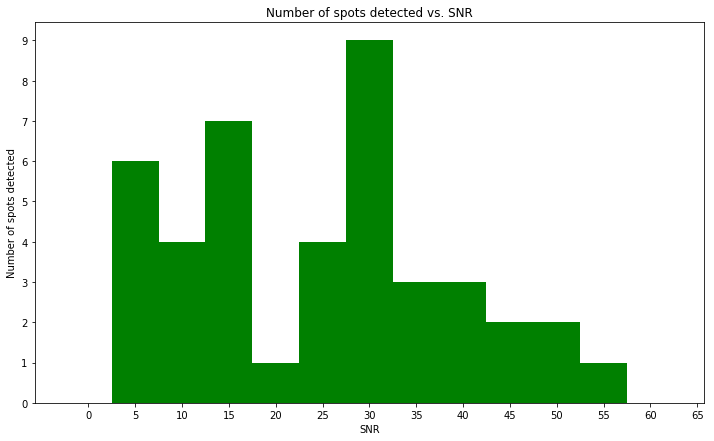

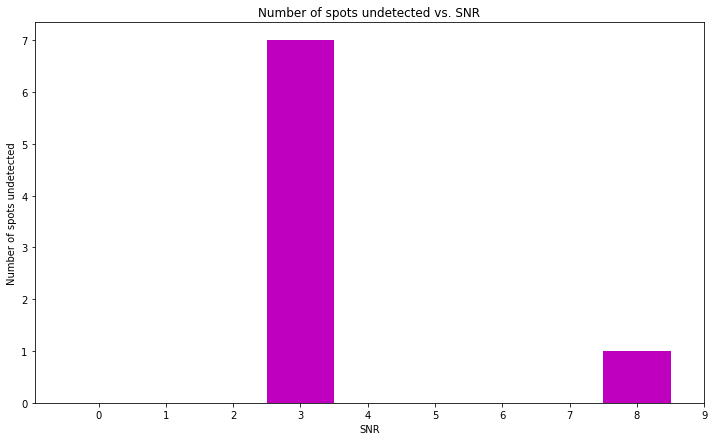

In [20]:
sa.plot_snr_vs_membership(anno_one_snr, clustering_params, csv_filename, img_height, img_filename, correctness_threshold, bigger_window_size)	

**Takeaways 20180722:** All spots with SNR=3 were not detected. All spots with SNR>3 (except for one spot with SNR=8) were detected. This plot suggests that the minimum SNR for a spot which a worker should be expected to detect is somewhere between 3 and 5.